In [125]:
pip install geopy


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: C:\Users\merce\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



     ------------------------------------- 119.8/119.8 kB 70.2 kB/s eta 0:00:00
     --------------------------------------- 40.3/40.3 kB 33.2 kB/s eta 0:00:00


In [127]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
from geopy.distance import geodesic

In [31]:
lista = [r"C:\Users\merce\Downloads\datos_abiertos_2022_07.csv", r"C:\Users\merce\Downloads\datos_abiertos_2022_08.csv", 
         r"C:\Users\merce\Downloads\datos_abiertos_2022_09.csv", r"C:\Users\merce\Downloads\datos_abiertos_2022_10.csv",
         r"C:\Users\merce\Downloads\datos_abiertos_2022_11.csv", r"C:\Users\merce\Downloads\datos_abiertos_2022_12.csv",
         r"C:\Users\merce\Downloads\datos_abiertos_2023_01.csv", r"C:\Users\merce\Downloads\datos_abiertos_2023_02.csv",
         r"C:\Users\merce\Downloads\datos_abiertos_2023_03.csv", r"C:\Users\merce\Downloads\datos_abiertos_2023_04.csv",
         r"C:\Users\merce\Downloads\datos_abiertos_2023_05.csv"]

df = pd.read_csv(r"C:\Users\merce\Downloads\datos_abiertos_2022_06.csv", encoding='latin-1')

In [32]:
for i in range(len(lista)):
    df2 = pd.read_csv(lista[i], encoding='latin-1')

    if df2.columns[3] != 'Año_de_nacimiento':
        # Cambiar el nombre de la segunda columna a 'Año_de_nacimiento'
        df2.rename(columns={df2.columns[3]: 'Año_de_nacimiento'}, inplace=True)
  
    df = pd.concat([df, df2])

In [33]:
df['Inicio_del_viaje'] = pd.to_datetime(df['Inicio_del_viaje'])
df['Fin_del_viaje'] = pd.to_datetime(df['Fin_del_viaje'])

# Extrae la columna de hora
df['Hora_Inicio'] = df['Inicio_del_viaje'].dt.time
df['Hora_Fin'] = df['Fin_del_viaje'].dt.time

# Calcula la duración del viaje
df['Duracion'] = (df['Fin_del_viaje'] - df['Inicio_del_viaje']).dt.total_seconds()/60

# Cambiar F y M por 0 y 1, respectivamente
df['Genero'] = df['Genero'].replace({'F': 0, 'M': 1})

# Calcular la edad en lugar de tener el año de nacimiento
df['Edad'] = 2022 - df['Año_de_nacimiento']

In [34]:
print(df['Año_de_nacimiento'].min(), df['Año_de_nacimiento'].max())
df = df.loc[(1930<df['Año_de_nacimiento']) & (df['Año_de_nacimiento']<2008)]

1.0 2022.0


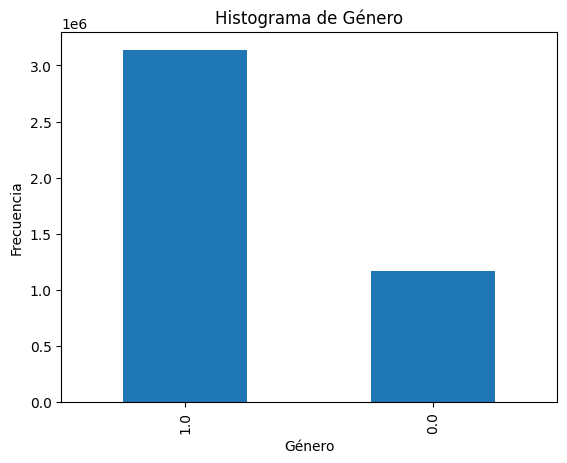

In [35]:
# Histograma de Género
df['Genero'].value_counts().plot.bar()

# Personaliza el grÃ¡fico
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Histograma de Género')

# Muestra el gráfico
plt.show()

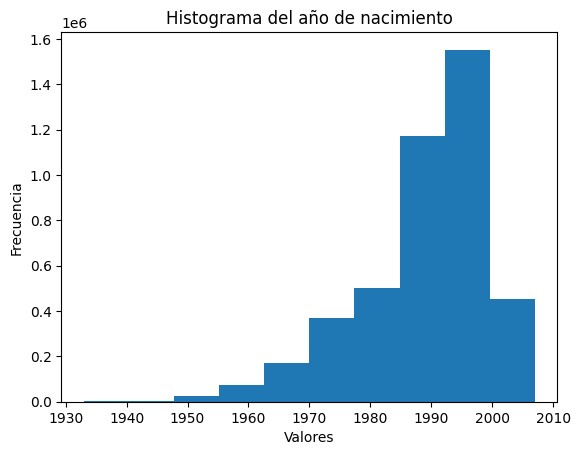

In [36]:
# Crea el histograma
plt.hist(df['Año_de_nacimiento'], bins=10)

# Configura las etiquetas y el título del histograma
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma del año de nacimiento')

# Muestra el histograma
plt.show()

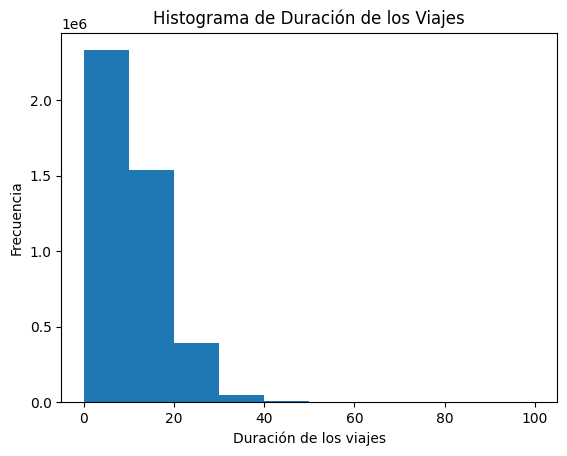

In [37]:
plt.hist(df['Duracion'][df['Duracion']<100])

# ConfiguraciÃ³n de las etiquetas y títulos
plt.xlabel('Duración de los viajes')
plt.ylabel('Frecuencia')
plt.title('Histograma de Duración de los Viajes')

# Mostrar el histograma
plt.show()

In [38]:
print(len(df[df['Duracion']>100]))
df = df.loc[df['Duracion']<100]

df['Hora_Fin'] = [valor.strftime('%H') for valor in df['Hora_Fin']]
df['Hora_Inicio'] = [valor.strftime('%H') for valor in df['Hora_Inicio']]

df['Hora_Inicio'] = df['Hora_Inicio'].astype(int)
df['Hora_Fin']    = df['Hora_Fin'].astype(int)

1206


In [128]:
df

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Hora_Inicio,Hora_Fin,Duracion,Edad
0,23745042,555657,1.0,1996.0,2022-06-01 00:01:24,2022-06-01 00:03:50,21,43,0,0,2.433333,26.0
1,23745043,32115,1.0,1967.0,2022-06-01 00:01:34,2022-06-01 00:08:42,34,34,0,0,7.133333,55.0
2,23745050,422615,1.0,1981.0,2022-06-01 00:02:55,2022-06-01 00:10:20,18,170,0,0,7.416667,41.0
3,23745053,535634,1.0,1994.0,2022-06-01 00:03:37,2022-06-01 00:30:55,38,181,0,0,27.300000,28.0
4,23745054,1545252,1.0,2002.0,2022-06-01 00:05:00,2022-06-01 00:25:35,289,118,0,0,20.583333,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
364153,28897242,1716032,1.0,1995.0,2023-05-31 23:59:22,2023-06-01 00:09:55,200,20,23,0,10.550000,27.0
364154,28897243,1542511,NaN,1998.0,2023-05-31 23:59:40,2023-06-01 00:24:55,88,327,23,0,25.250000,24.0
364155,28897244,631056,1.0,1998.0,2023-05-31 23:59:43,2023-06-01 00:02:58,66,43,23,0,3.250000,24.0
364156,28897245,610456,1.0,1993.0,2023-05-31 23:59:47,2023-06-01 00:13:06,153,234,23,0,13.316667,29.0


In [131]:
df_distance = pd.read_csv(r"C:\Users\merce\Downloads\nomenclatura_2023_05.csv", encoding='latin-1')
df_distance = df_distance[['id', 'latitude', 'longitude']]
df_distance.head()

,id,latitude,longitude
0,2,20.666378,-103.348820
1,3,20.667228,-103.366000
2,4,20.667690,-103.368252
3,5,20.691750,-103.362550
4,6,20.681151,-103.338863


In [146]:
from geopy.distance import distance

# Supongamos que tienes dos DataFrames: df_trayectos y df_ubicaciones
# Fusionar los DataFrames por los IDs de inicio y partida
df_fusionado = pd.merge(df[['Origen_Id','Destino_Id']], df_distance, left_on='Origen_Id', right_on='id', how='left')
df_fusionado = pd.merge(df_fusionado, df_distance, left_on='Destino_Id', right_on='id', how='left', suffixes=('_inicio', '_final'))

#coordenadas_inicio  = df_fusionado[['latitude_inicio', 'longitude_inicio']].values
#coordenadas_destino = df_fusionado[['latitude_final', 'longitude_final']].values

# Calcula las distancias utilizando la función cdist
df_fusionado['distancia'] = df_fusionado.apply(lambda row: distance((row['latitude_inicio'], row['longitude_inicio']), (row['latitude_final'], row['longitude_final'])).kilometers, axis=1)

# Agregar las distancias al DataFrame de trayectos
#df['Distancia'] = distancias

# Mostrar el DataFrame de trayectos con las distancias calculadas
df_fusionado.head()

KeyboardInterrupt: 

In [67]:
df_new = df[['Hora_Fin', 'Hora_Inicio' ,'Duracion', 'Edad', 'Genero']]
df_new = df_new.dropna()

KeyboardInterrupt: 

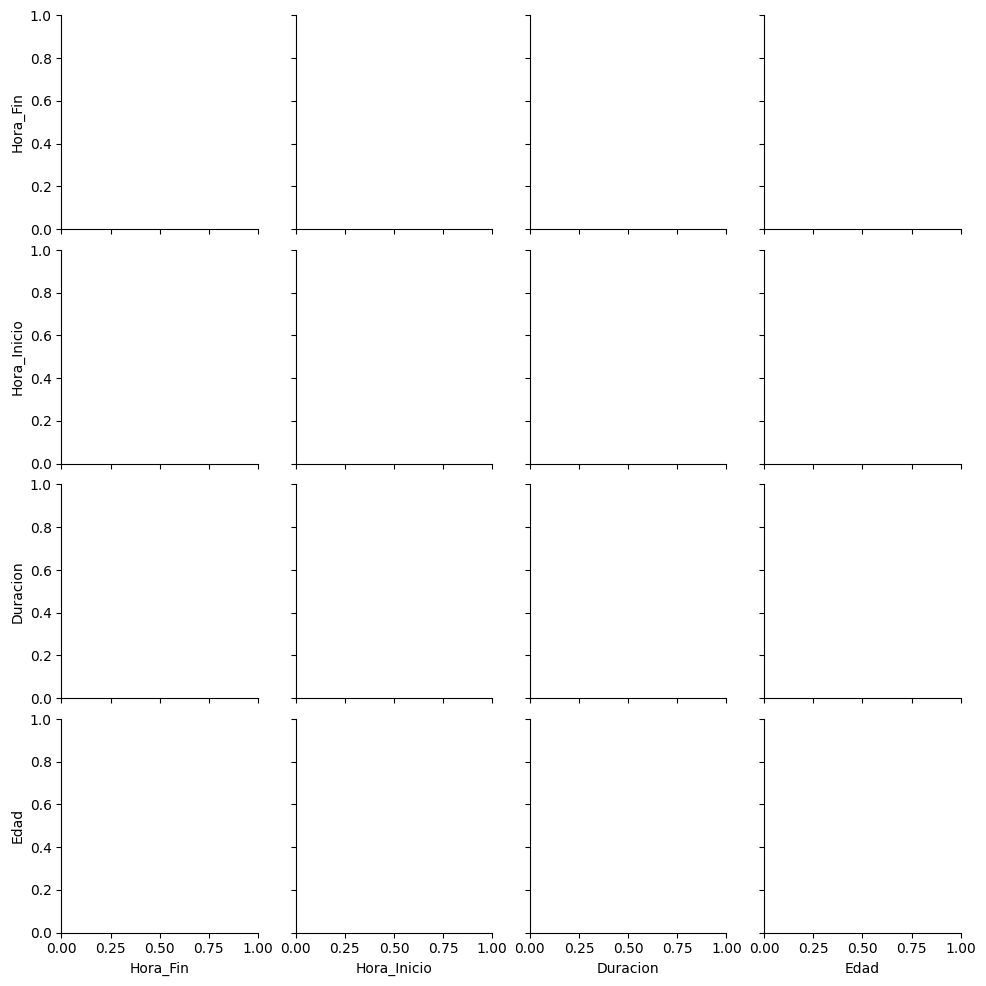

In [126]:
graf = sns.pairplot(df_new[['Hora_Fin', 'Hora_Inicio' ,'Duracion', 'Edad']])
plt.savefig(r"C:\Users\merce\Downloads\Graf_dispersion.png")

# ***K-means***

2
3
4
5
6
7
8
9
10


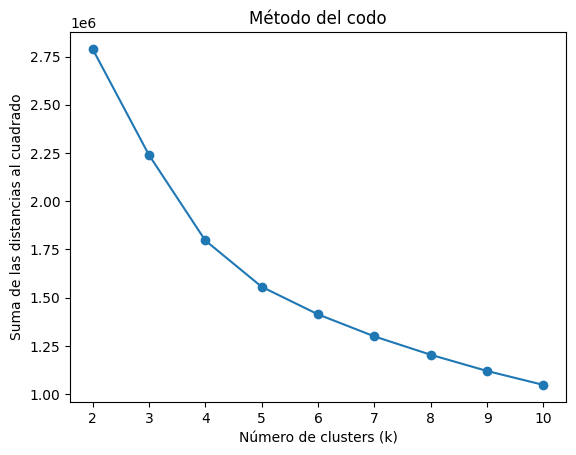

Número óptimo de clusters (método de la silueta): 2


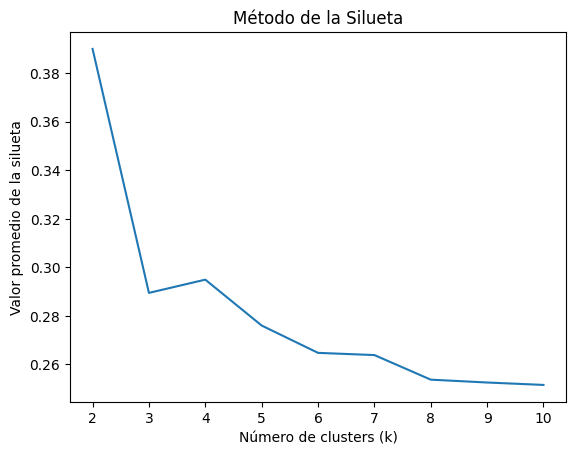

In [80]:
# Calcular la suma de las distancias al cuadrado para diferentes valores de k
distortions = []
silhouette_scores = []

sample = df_new.sample(n=int(len(df_new)*0.005))
k_values = range(2, 11)
for k in k_values:
    print(k)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(sample)
    distortions.append(kmeans.inertia_)
    
    # Calcular el valor de la silueta para los datos
    silhouette_avg = silhouette_score(sample, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Graficar la suma de las distancias al cuadrado en función de k
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de las distancias al cuadrado')
plt.title('Método del codo')
plt.show()


# Encontrar el valor de k que maximiza el promedio de la silueta
best_k = k_values[np.argmax(silhouette_scores)]

# Imprimir el número óptimo de clusters
print("Número óptimo de clusters (método de la silueta):", best_k)

# Visualizar el gráfico de la silueta
plt.plot(k_values, silhouette_scores)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Valor promedio de la silueta')
plt.title('Método de la Silueta')
plt.show()

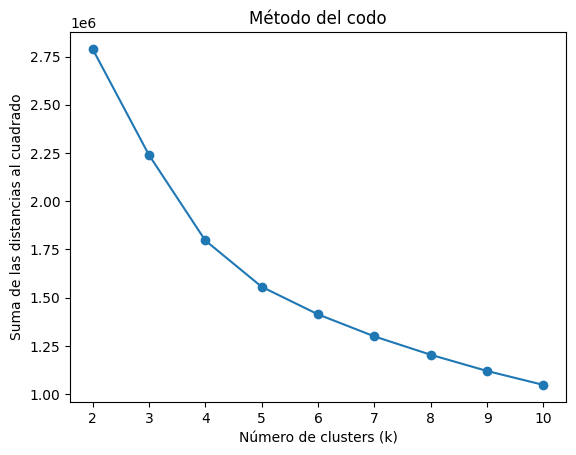

In [119]:
graph = plt.plot(k_values, distortions, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de las distancias al cuadrado')
plt.title('Método del codo')
plt.savefig(r"C:\Users\merce\Downloads\Metodo_codo.png")

El "codo" en el gráfico se refiere al punto en el que la reducción de la SSD se vuelve menos significativa a medida que aumenta k. Este punto se considera una buena elección para el número de clusters, ya que proporciona un equilibrio entre la compresión de los datos y la simplicidad del modelo. En otras palabras, el codo representa un punto en el que agregar más clusters ya no mejora significativamente la calidad del clustering.

Por lo tanto, al utilizar el método del codo, se busca seleccionar el valor de k en el punto del gráfico donde la reducción de la SSD ya no es sustancialmente mayor. Esto implica encontrar un equilibrio entre la calidad del clustering y la simplicidad del modelo.

No parece haber k óptimo.

In [107]:
# Crear un objeto de KMeans
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_new)
labels = kmeans.labels_

# Obtener los centroides de los clusteres
centroids = kmeans.cluster_centers_

## ***PCA***

In [108]:
# Realizar reducción de dimensionalidad utilizando PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(df_new)

In [109]:
componentes    = pca.components_
df_cargas      = pd.DataFrame(componentes, columns = df_new.columns)
variance_ratio = pca.explained_variance_ratio_

# Calcula la varianza acumulada
cumulative_variance = np.cumsum(variance_ratio)

# Visualiza las cargas de componentes
print(df_cargas)

# Imprime la varianza explicada de cada componente
for i, ratio in enumerate(variance_ratio):
    print(f"Componente {i+1}: {ratio}")

# Imprime la varianza acumulada
print("Varianza acumulada:")
for i, variance in enumerate(cumulative_variance):
    print(f"Componentes 1-{i+1}: {variance}")

   Hora_Fin  Hora_Inicio  Duracion      Edad    Genero    labels
0  -0.03558    -0.036620  0.040187  0.997280  0.005341 -0.034395
1   0.18536     0.174116  0.966774 -0.025899 -0.001337  0.001300
2  -0.68294    -0.682910  0.252335 -0.059602 -0.000878  0.000095
Componente 1: 0.5352972212050995
Componente 2: 0.2505386074327185
Componente 3: 0.21015557362058288
Varianza acumulada:
Componentes 1-1: 0.5352972212050995
Componentes 1-2: 0.785835828637818
Componentes 1-3: 0.9959914022584009


In [110]:
df_new['labels'] = labels

C:\Users\merce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:18: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

C:\Users\merce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



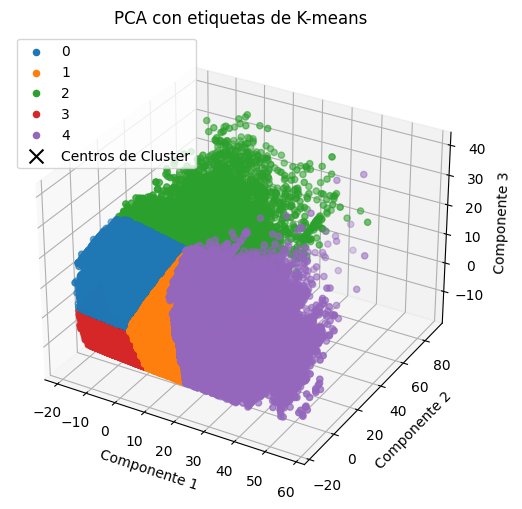

In [120]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
reduced_data = pd.DataFrame(reduced_data, columns=['Componente 1', 'Componente 2', 'Componente 3'])
reduced_data['labels'] = labels

for label in set(df_new['labels']):
    subset = reduced_data[reduced_data['labels'] == label]
    ax.scatter(subset['Componente 1'], subset['Componente 2'], subset['Componente 3'], label=label)

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
           c='black', marker='x', s=100, label='Centros de Cluster')

ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
ax.legend()
plt.title('PCA con etiquetas de K-means')
plt.savefig(r"C:\Users\merce\Downloads\PCA_k{}.png".format(k))

## ***TSNE***

In [112]:
sample_df = df_new.sample(n=int(len(df_new)*0.0005))

In [113]:
features = sample_df[['Genero', 'Hora_Fin', 'Hora_Inicio' ,'Duracion', 'Edad']]
tsne = TSNE(n_components=3, perplexity=20, random_state=42)
tsne_results = tsne.fit_transform(features)

# Create a DataFrame with the t-SNE results and gender labels
tsne_df = pd.DataFrame(tsne_results, columns=['Componente 1', 'Componente 2', 'Componente 3'])
tsne_df['labels'] = sample_df['labels'].reset_index(drop=True)

C:\Users\merce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\merce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



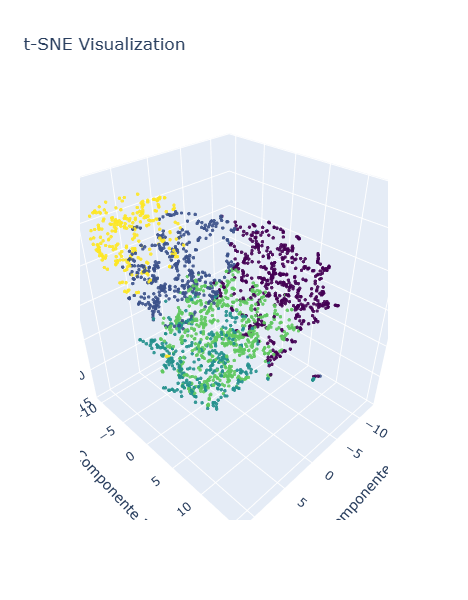

In [114]:
# Plotear t-SNE en 3D
# Crear el gráfico interactivo en 3D con Plotly
fig = go.Figure(data=go.Scatter3d(
    x=tsne_df['Componente 1'],
    y=tsne_df['Componente 2'],
    z=tsne_df['Componente 3'],
    mode='markers',
    marker=dict(
        size=2,
        color=tsne_df['labels'],
        colorscale='Viridis',
        opacity=0.9
    )
))

# Configurar los ejes y el título del gráfico
fig.update_layout(scene=dict(
    xaxis_title='Componente 1',
    yaxis_title='Componente 2',
    zaxis_title='Componente 3'
))

fig.update_layout(title_text='t-SNE Visualization')
fig.update_layout(width=800, height=600)  

# Mostrar el grÃ¡fico interactivo
fig.show()

## Análisis de ***K-Means*** 

Genero          0.700632
Hora_Fin        9.237632
Hora_Inicio     9.169177
Duracion        8.050400
Edad           27.210385
dtype: float64
Genero          0.794497
Hora_Fin       14.630288
Hora_Inicio    14.528100
Duracion        8.610941
Edad           40.037731
dtype: float64
Genero          0.697588
Hora_Fin       15.453038
Hora_Inicio    15.210309
Duracion       22.231491
Edad           29.590213
dtype: float64
Genero          0.693470
Hora_Fin       18.068117
Hora_Inicio    17.949915
Duracion        7.938462
Edad           26.622849
dtype: float64
Genero          0.819347
Hora_Fin       13.523183
Hora_Inicio    13.373349
Duracion       11.534731
Edad           55.039455
dtype: float64


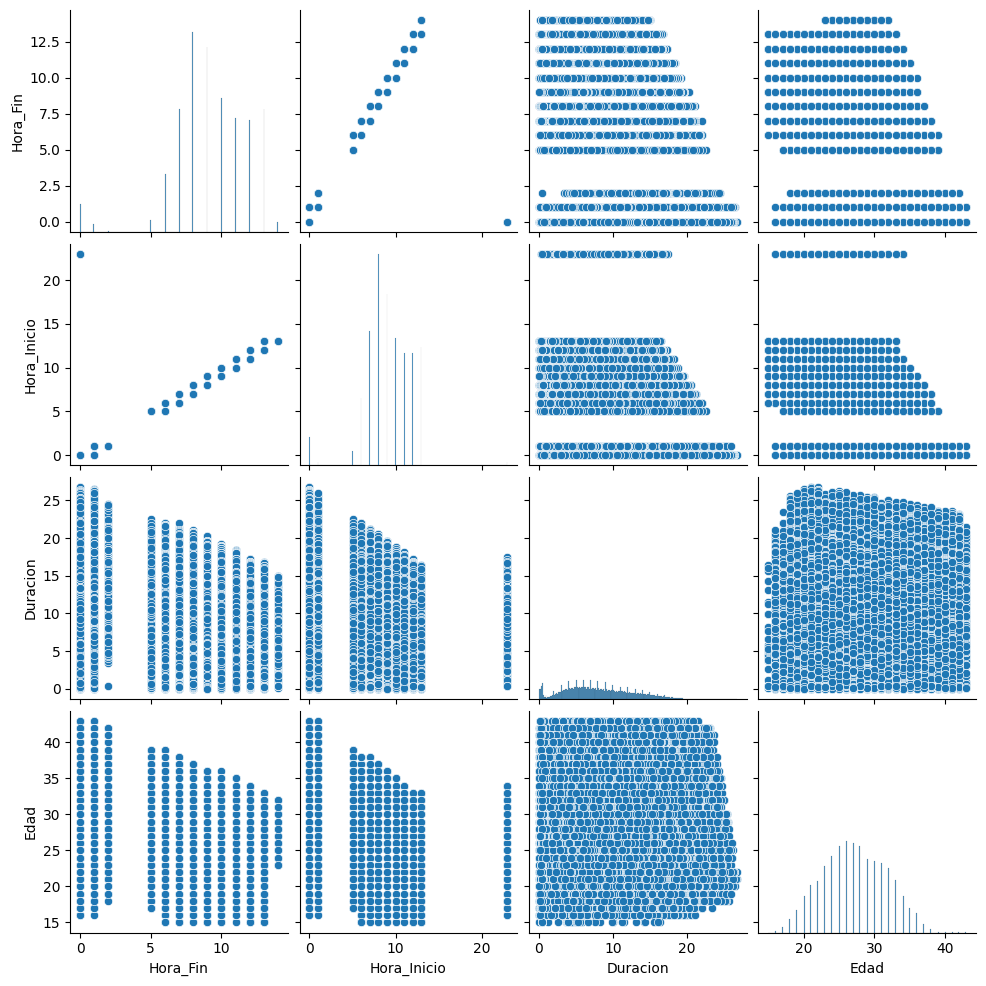

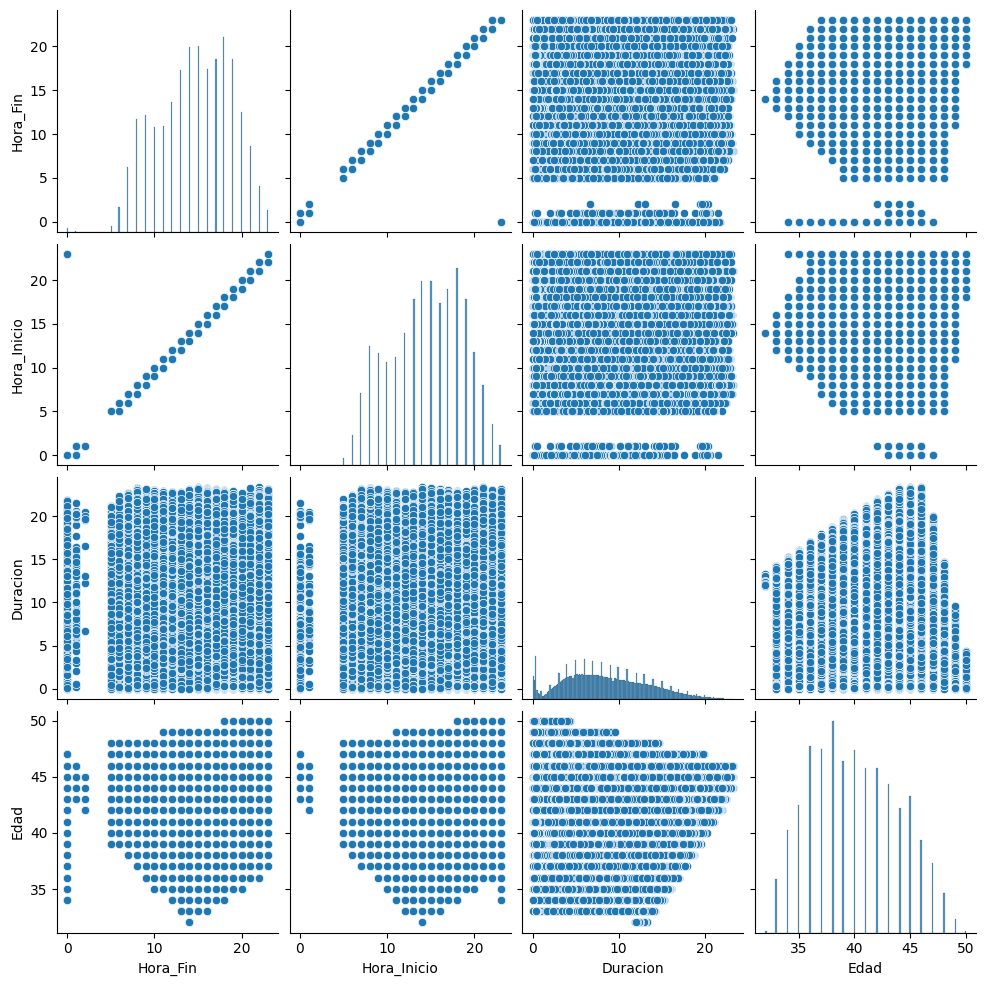

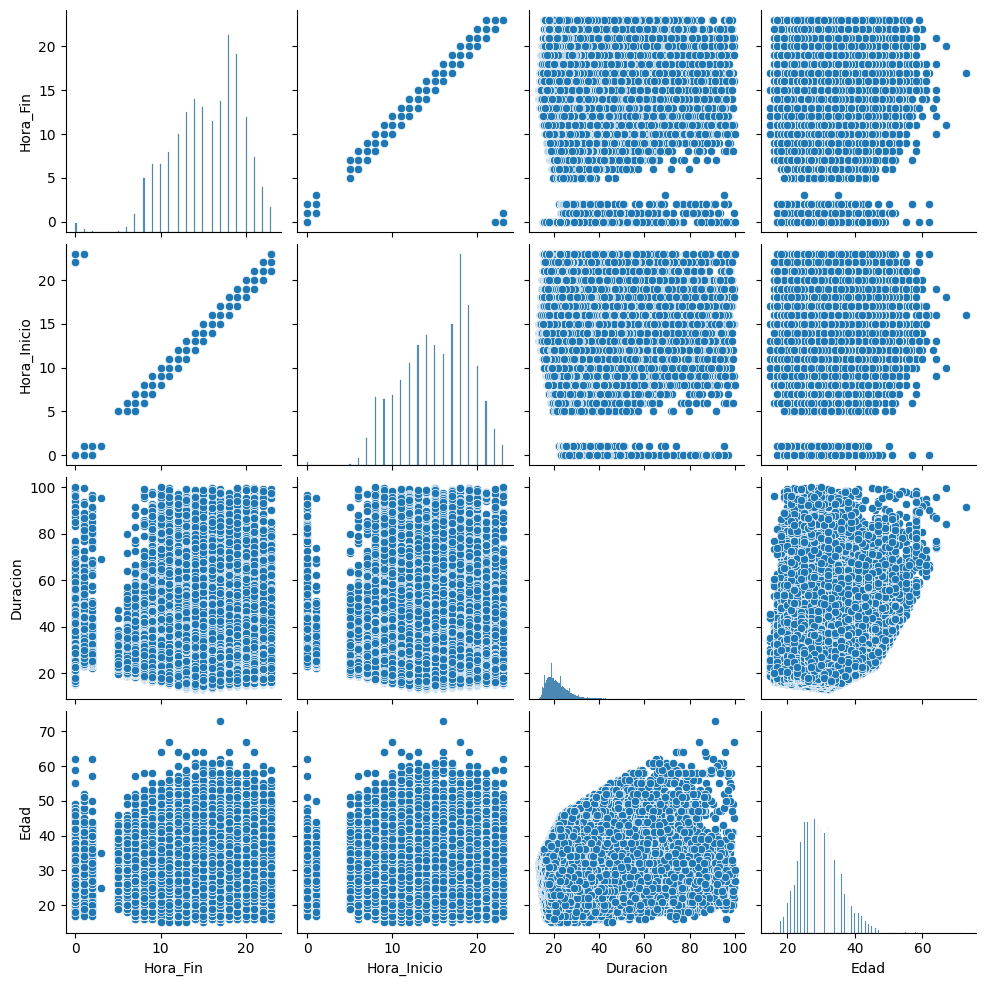

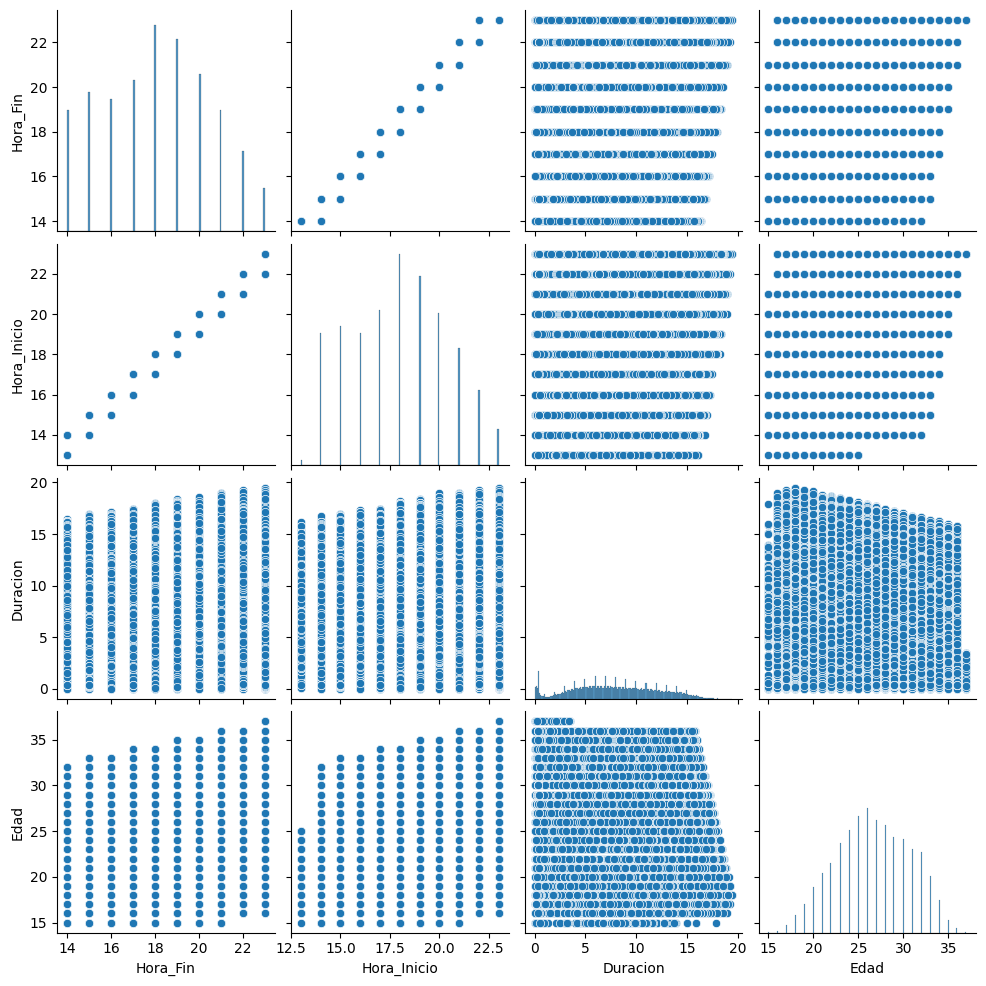

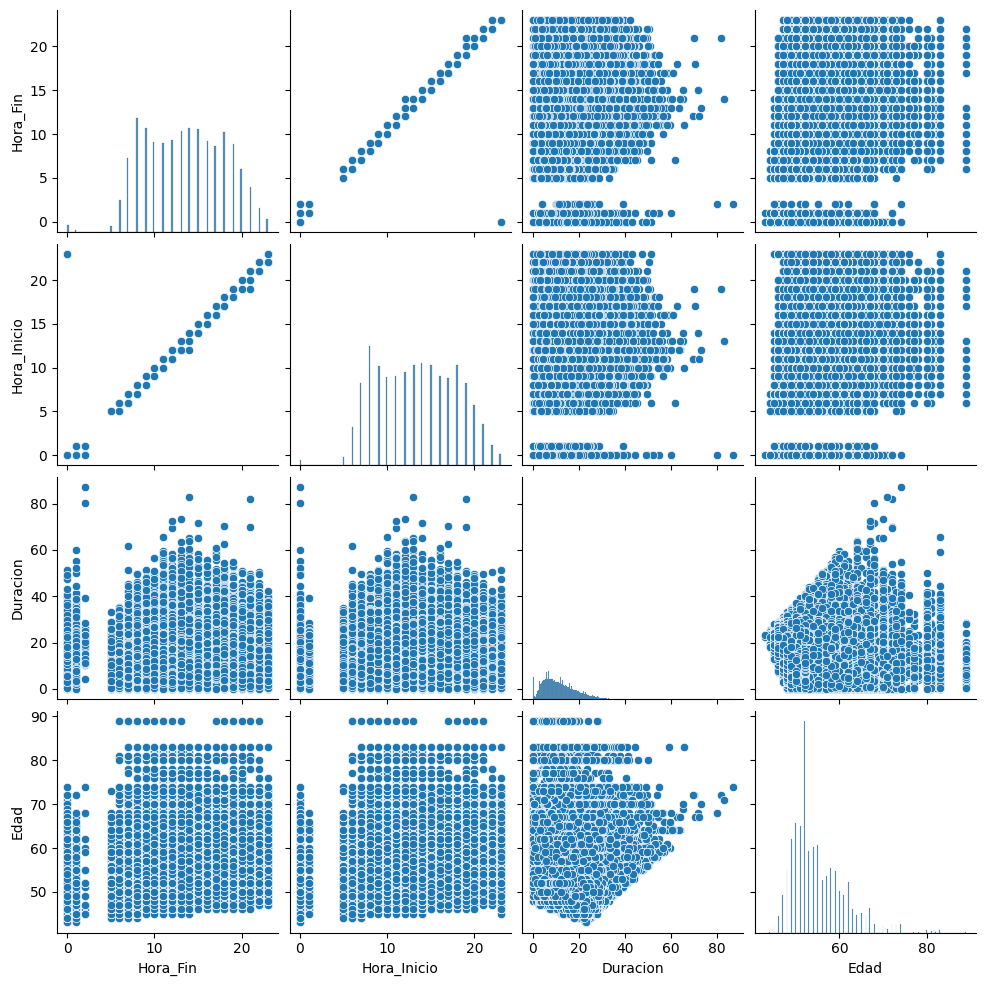

In [115]:
for i in range(k):
    print(df_new[['Genero', 'Hora_Fin', 'Hora_Inicio', 'Duracion', 'Edad']][df_new['labels']==i].mean())
    
    ploteado = sns.pairplot(df_new[['Hora_Fin', 'Hora_Inicio', 'Duracion', 'Edad']][df_new['labels']==i])
    plt.savefig(r"C:\Users\merce\Downloads\K_means_5_{}.png".format(i), dpi=300)